In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device Config

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Hypter Parameters

In [5]:
input_size = 28 * 28 
hidden_size = 100
num_classes = 10
n_epoch = 2
batch_size = 100
lr = 0.001

# Data 

In [7]:
train_dataset = torchvision.datasets.MNIST(
    root='../data', 
    train=True, 
    transform=transforms.ToTensor(), 
    download=True
)
test_dataset = torchvision.datasets.MNIST(
    root='../data', 
    train=False, 
    transform=transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size,
    shuffle=True 
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=batch_size,
    shuffle=False 
)


0.7%

100.0%


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



102.8%

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




7.9%

100.0%


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



112.7%

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw




/home/wenhan/Documents/ML-Projects/torch-proj/.venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape, labels.shape) # 100 images (1 * 28 * 28) grey scale

torch.Size([100, 1, 28, 28]) torch.Size([100])


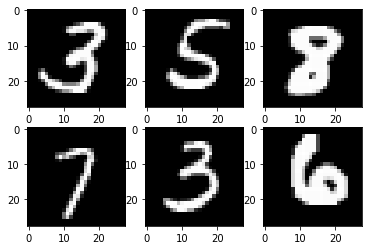

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

# Define Model

In [28]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden_size, out_features=num_classes)

    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out # do not need softmax function becoz cross entropy function will apply softmax
    
model = NeuralNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)



# Training

In [30]:
n_total_steps = len(train_loader)
for epoch in range(n_epoch):
    for i, (imgs, labels) in enumerate(train_loader):
        # need to reshape imgs (100 * 1 * 28 * 28)
        # need imgs to be (100 * 784)
        imgs = imgs.reshape(-1, 28*28).to(device) # '-1' auto matches the first number '100', push to device
        labels = labels.to(device)

        y_out = model(imgs)
        loss = criterion(y_out, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{n_epoch}, step {i+1}/{n_total_steps}: Loss={loss.item():.4f}')


epoch 1/2, step 100/600: Loss=0.3481
epoch 1/2, step 200/600: Loss=0.2970
epoch 1/2, step 300/600: Loss=0.3274
epoch 1/2, step 400/600: Loss=0.2592
epoch 1/2, step 500/600: Loss=0.3492
epoch 1/2, step 600/600: Loss=0.1680
epoch 2/2, step 100/600: Loss=0.1541
epoch 2/2, step 200/600: Loss=0.2481
epoch 2/2, step 300/600: Loss=0.2719
epoch 2/2, step 400/600: Loss=0.0956
epoch 2/2, step 500/600: Loss=0.1679
epoch 2/2, step 600/600: Loss=0.1274


# Test Result

In [31]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for imgs, labels in test_loader:
        imgs = imgs.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        y_out = model(imgs)
        _, predictions = torch.max(y_out, 1) # along dim 1
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = n_correct/n_samples
    print(f'Test accuracy = {acc:.4f}')

Test accuracy = 0.9534
